#Información del dataset y objetivos del proyecto

El presente DataSet tiene como objetivo principal explorar y analizar un conjunto de datos enfocados en la predicción de accidentes cerebrovasculares (ACV o stroke) a partir de las variables clinicas y demográficas. El dataset
incluye informacion de mas de 5000 pacientes, registrando variables como la edad, sexo, los niveles de glucosa en sangre, estado civil, tipo de empleo, historial de enfermedades cardíacas e hipertensión entre otras.
A través del análisis exploratorio y visualizacion de datos, se buscará identificar los factores que muestran una mayor asociacióncon la ocurrencia de un ACV. Particularmente, variables como la edad, los niveles de glucosa, el estado de fumador y la presencia de enfermedades cardiacas emergen como posibles predictores significativos del riesgo de ACV.Se realizaran visualizaciones univariadas, bivariadas y multivariadas para observar patrones, relaciones y posibles combinaciones de riesgo, prestando especial atencion a la interaccion entre edad, habitos y condiciones preexistentes.
Asimismo se llevara a cabo un diagnóstico sobre los valores perdidos, encontrandose ausencias unicamente en la columna de índice de masa corporal, las cuales se abordarían mediante técnicas apropiadas según la distribución observada. Este análisis tiene como finalidad no solo entender las correlaciones entre variables si no tambien generar hipótesis que permitan mejorar la prevencion temprana de ACV mediante el uso de modelos predictivos.



# Carga de las librerias y el dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 16TWjWZNHE--r9j7LeNdykBUT8_6e-zx9

Downloading...
From: https://drive.google.com/uc?id=16TWjWZNHE--r9j7LeNdykBUT8_6e-zx9
To: /content/5_ACV_prediction.csv
100% 317k/317k [00:00<00:00, 67.9MB/s]


In [ ]:
#Vizualizacion de los primeros registros del dataset
df1 = pd.read_csv('/content/5_ACV_prediction.csv')
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Hipótesis 1: Las personas con enfermedades cardiacas tienen mayor incidencia de ACV(stroke) que las personas sin enfermedades cardiacas.

Hipótesis 2: A mayor edad, mayor es la posibilidad de haber tenido un ACV(stroke).

Hipótesis 3: Las personas con niveles de glucosa más altos tienen mayor riesgo de ACV que las personas con niveles bajos o normales.

Hipótesis 4: Las personas fumadoras (actuales o exfumadoras) presentan una mayor tasa de ACV que las personas que nunca fumaron.

Hipótesis 5: El riesgo de ACV aumentan cuando se combinan edad avanzada, hipertensión y niveles altos de glucosa.

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


Se presenta una tabla con las estadísticas de cada una de las variables cuantitativas en el df con la finalidad de tener un panorama de las distribuciones de las mismas. Esto nos permitirá tomar decisiones respecto a "que hacer" con los nan presentes en la columna de la variable bmi

In [ ]:
df1.isna().sum()/df1.shape[0]*100

,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


En esta tabla podemos apreciar que tenemos un total de 201 nan en la columna bmi, los cuales representan casi un 4% y podrian ser reemplazados por la mediana ya que estarían menos afectados por los outliers basandome en las visualizaciones siguientes.

In [ ]:
# Calculo la mediana de la columna bmi
bmi_median = df1["bmi"].median()

# Reemplazamos los valores NaN con la mediana
df1["bmi"].fillna(bmi_median, inplace=True)

#Compruebo en la tabla
df1.isna().sum()/df1.shape[0]*100

/tmp/ipython-input-2926817581.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["bmi"].fillna(bmi_median, inplace=True)


,0
id,0.0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
ever_married,0.0
work_type,0.0
Residence_type,0.0
avg_glucose_level,0.0
bmi,0.0


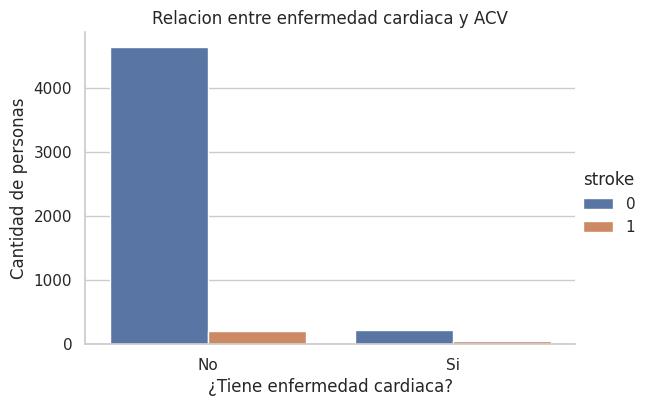

In [ ]:
sns.set(style="whitegrid")
sns.catplot(data=df1, x="heart_disease", hue="stroke", kind="count", height=4, aspect=1.5)
plt.title("Relacion entre enfermedad cardiaca y ACV")
plt.xlabel("¿Tiene enfermedad cardiaca?")
plt.ylabel("Cantidad de personas")
plt.xticks([0, 1], ["No", "Si"])
plt.show()

Este gráfico nos permite comparar cuantas personas con y sin enfermedades cardiacas tuvieron stroke (0=no, 1=si). En este se observa que la proporcion de strokes es notablemente mayor en el grupo con heart_disease = 1, lo que refuerza la Hipótesis planteada anteriormente.

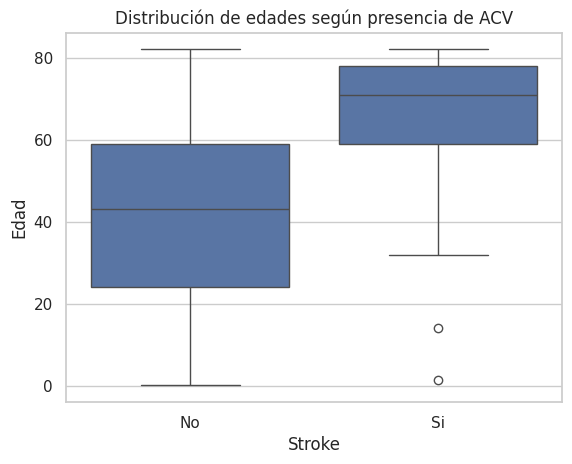

In [ ]:
sns.boxplot(data=df1, x="stroke", y="age")
plt.title("Distribución de edades según presencia de ACV")
plt.xlabel("Stroke")
plt.ylabel("Edad")
plt.xticks([0, 1], ["No", "Si"])
plt.show()

Este boxplot muestra la mediana, los cuartiles y los valores atípicos y nos permite ver si es que las personas con ACV son generalmente mayores. Podemos ver que la caja de stroke=1 se desplaza hacia edades mayores, lo que refuerza la hipótesis.

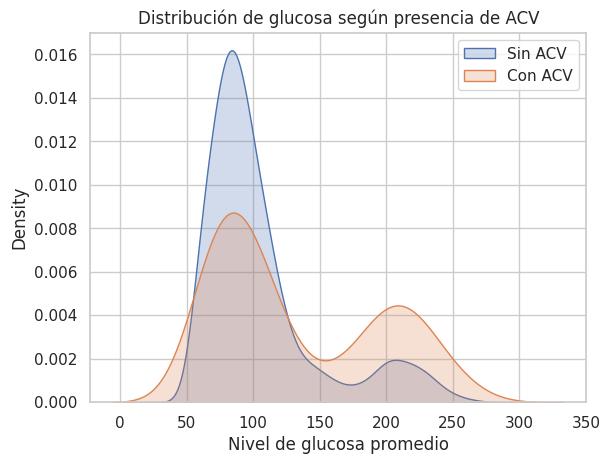

In [ ]:
sns.kdeplot(data=df1[df1["stroke"]==0]["avg_glucose_level"], label="Sin ACV", fill=True)
sns.kdeplot(data=df1[df1["stroke"]==1]["avg_glucose_level"], label="Con ACV", fill=True)
plt.title("Distribución de glucosa según presencia de ACV")
plt.xlabel("Nivel de glucosa promedio")
plt.legend()
plt.show()

Las curvas de densidad KDE permiten ver que los niveles de glucosa son más altos en quienes tuvieron un ACV lo cual refuerza la hipótesis.

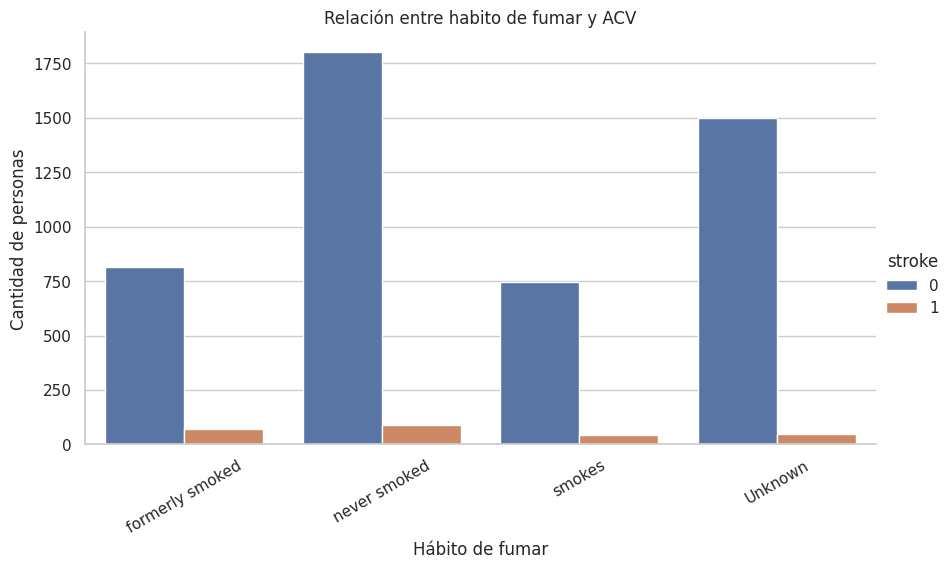

In [ ]:
sns.catplot(data=df1, x="smoking_status", hue="stroke", kind="count", height=5, aspect=1.8)
plt.title("Relación entre habito de fumar y ACV")
plt.xticks(rotation=30)
plt.xlabel("Hábito de fumar")
plt.ylabel("Cantidad de personas")
plt.show()

Podemos apreciar que los grupos de fumadores tienen una proporcion mayor de ACV que los no fumadores, lo cual apoya a la hipótesis.

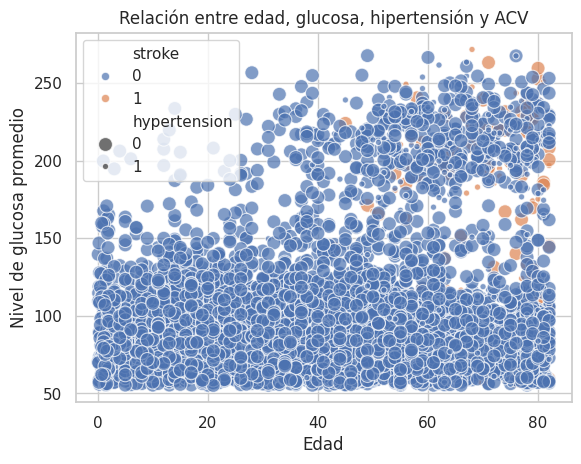

In [ ]:
sns.scatterplot(data=df1, x="age", y="avg_glucose_level", hue="stroke", size="hypertension", sizes=(20, 100), alpha=0.7)
plt.title("Relación entre edad, glucosa, hipertensión y ACV")
plt.xlabel("Edad")
plt.ylabel("Nivel de glucosa promedio")
plt.show()

Los puntos naranjas se concentran en un rango más alto de edades mostrando que hay más ACV en personas mayores. La hipertensión parece ser un factor de riesgo importante para el ACV, especialmente en individuos de mayor edad. La relación entre el nivel de glucosa promedio y el ACV no es tan directa y podría estar influenciada por la edad y la presencia de hipertensión. Es posible que niveles muy altos de glucosa, en combinación con otros factores de riesgo como la edad y la hipertensión, aumenten el riesgo de ACV.

##Tipo de aprendizaje y justificación
Nuestro objetivo es predecir o clasificar si una persona tuvo o no un ACV (stroke).

La variable objetivo (stroke) ya está etiquetada en el dataset:

0 → No tuvo ACV

1 → Tuvo ACV

Sabemos el "resultado correcto" para cada registro. Entonces, aprendemos a partir de ejemplos etiquetados.

El aprendizaje supervisado se utiliza siempre que existe una salida esperada conocida para cada entrada.

Como primer enfoque se sugiere utilizar una regresión logística debido a su facilidad de implementación, su capacidad de interpretación y su eficacia en establecer un rendimiento base en problemas de clasificación binaria, especialmente en contextos de salud. Posteriormente, podrían explorarse modelos más complejos como Random Forest o XGBoost para mejorar las predicciones, pero particularmente solo lo realizaré con los modelos vistos en clases.

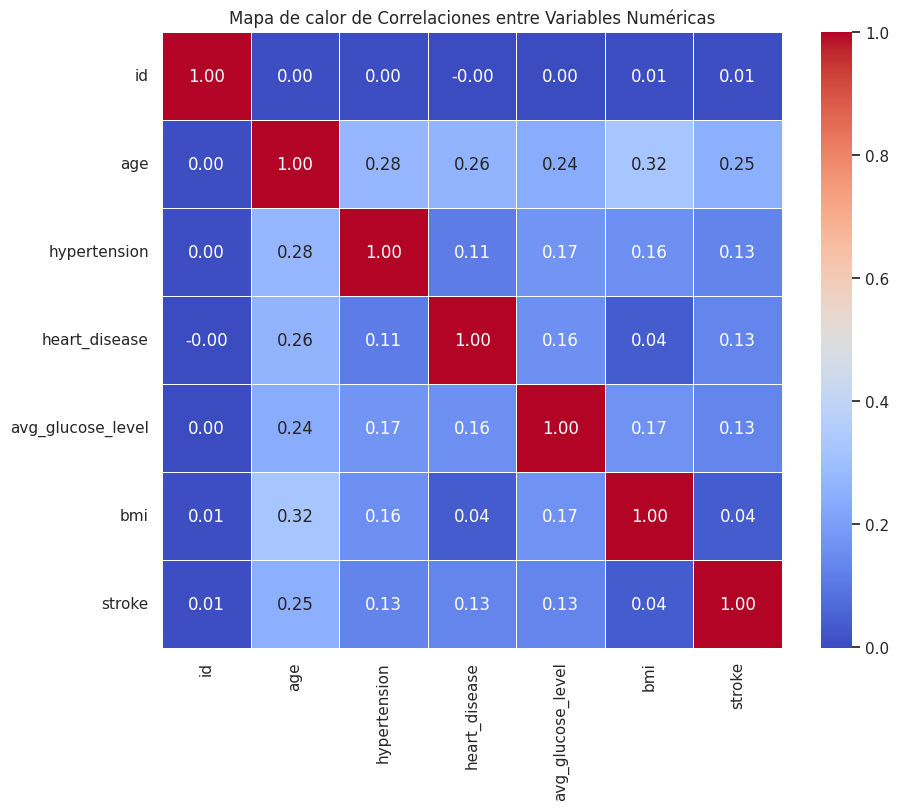

In [ ]:
# Cálculo de la matriz de correlaciones
corr_matrix = df1.corr(numeric_only=True)

# Configuración del gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de Correlaciones entre Variables Numéricas")
plt.show()

# **Análisis y manejo de los datos atípicos**

##Tratamiento de Outliers por edad

In [ ]:
df1['age'].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


In [ ]:
#Filtrado de valores Atípicos utilizando rangos intercuartilicos.
#Cálculo del Q1 y Q3
Q1 = df1['age'].quantile(0.25)

Q3 = df1['age'].quantile(0.75)

#Cálculo del rango intercuartílico
IQR = Q3 - Q1

#Definición de los límites para detectar OUTLIERS
limite_inferior  = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [ ]:
#Observación de los valores Q1 y Q3
print(" Valor Q1:", Q1)
print("Valor Q3:", Q3)
#Valor del rango intercuartilico
print("Valor IQR:", IQR)
#Valores de rango inferior y superior
print("Valor limite inferior:", limite_inferior)
print("Valor limite superior:", limite_superior)

 Valor Q1: 25.0
Valor Q3: 61.0
Valor IQR: 36.0
Valor limite inferior: -29.0
Valor limite superior: 115.0


In [ ]:
#filtro de datos para obtener información entre los valores extremos y los valores con los que se obtuvieron estos datos
df1[(df1['age'] < limite_inferior) | (df1['age'] > limite_superior)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Esta linea de código me está devolviendo todos los datos que están fuera del rango normal. El resultado obtenido muestra todos los datos que se encuentran por debajo del límite inferior o por encima del límite superior. En el caso de la variable 'age' (edad) esto lo pudimos apreciarlo en el gráfico del Boxplot donde en el caso de strokes = 1 solo dos valores atípicos podian apreciarse en edades tempranas.

##Tratamiento de Ouliers por IMC (bmi)

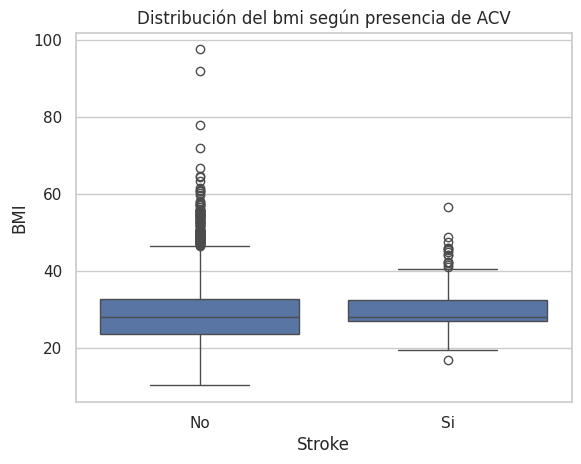

In [ ]:
#Primeramente observamos el boxplot
sns.boxplot(data=df1, x="stroke", y="bmi")
plt.title("Distribución del bmi según presencia de ACV")
plt.xlabel("Stroke")
plt.ylabel("BMI")
plt.xticks([1, 0], ["Si", "No"])
plt.show()

El gráfico muestra una gran cantidad de outliers en ambos grupos, pero son más numerosos y alcanzan valores más extremos en el grupo que no sufrió un ACV.

In [ ]:
#Vamos a realizar un análisis similar para las variables bmi y glucose_level

bmi_Q1 = df1['bmi'].quantile(0.25)

bmi_Q3 = df1['bmi'].quantile(0.75)

#Cálculo del rango intercuartílico
bmi_IQR = bmi_Q3 - bmi_Q1

#Definición de los límites para detectar OUTLIERS
bmi_limite_inferior  = bmi_Q1 - 1.5 * bmi_IQR
bmi_limite_superior = bmi_Q3 + 1.5 * bmi_IQR

In [ ]:
#Observación de los valores Q1 y Q3
print(" Valor Q1:", bmi_Q1)
print("Valor Q3:", bmi_Q3)
#Valor del rango intercuartilico
print("Valor IQR:", bmi_IQR)
#Valores de rango inferior y superior
print("Valor limite inferior:", bmi_limite_inferior)
print("Valor limite superior:", bmi_limite_superior)

 Valor Q1: 23.8
Valor Q3: 32.8
Valor IQR: 8.999999999999996
Valor limite inferior: 10.300000000000006
Valor limite superior: 46.29999999999999


Los cálculos estadísticos confirman que un valor atípico de BMI es cualquier valor superior a 46.29. A primera vista, esto podría parecer contradictorio, ya que se esperaría que un BMI extremadamente alto estuviera más asociado a un ACV. La conclusión más importante es que el BMI por sí solo no parece ser el único ni el principal factor determinante de un ACV en este conjunto de datos. Aunque existe una asociación entre un BMI elevado y el riesgo de enfermedades cardiovasculares, la presencia de muchos individuos con un IMC muy alto sin haber sufrido un ACV sugiere que otras variables, como la hipertensión, las enfermedades cardíacas o el tabaquismo (mencionadas en las cabeceras de la tabla), probablemente juegan un papel más importante. Para obtener una conclusión más sólida, sería necesario analizar la distribución de estas otras variables en ambos grupos.

In [ ]:
#Identificar outliers
df1[(df1['bmi'] < bmi_limite_inferior) | (df1['bmi'] > bmi_limite_superior)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,17004,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,72696,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,40732,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,38349,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


Esta linea de código me está devolviendo todos los datos que están fuera del rango normal. El resultado obtenido muestra todos los datos que se encuentran por debajo del límite inferior o por encima del límite superior.

In [ ]:
#Voy a crear una variable donde solo consigne los Outliers para tratarlos
df_bmi_outliers = df1[(df1['bmi'] < bmi_limite_inferior) | (df1['bmi'] > bmi_limite_superior)]

In [ ]:
#Reordenamos los datos de manera descendente
df_bmi_outliers.sort_values(by='bmi', ascending= False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.00,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.00,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0
928,41097,Female,23.00,1,0,No,Private,Urban,70.03,78.0,smokes,0
544,545,Male,42.00,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
1559,37759,Female,53.00,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
415,51983,Female,33.00,0,0,Yes,Private,Rural,71.16,46.5,smokes,0
2393,54172,Female,41.00,0,0,Yes,Private,Urban,140.93,46.5,Unknown,0
4571,37192,Female,40.00,0,0,Yes,Private,Urban,72.99,46.4,Unknown,0
4894,53323,Female,34.00,0,0,No,Govt_job,Urban,79.60,46.3,never smoked,0


Podemos observar que 126 registros son los que representan datos atípicos en la variable bmi

In [ ]:
#Ahora vamos a reemplazar los valores atípicos utilizando la técnica de capping o imputación de datos
# Definir los límites calculados
limite_inferior = 10.30
limite_superior = 46.29

# Aplicar la imputación a la columna 'bmi'
# Todos los valores fuera del rango [limite_inferior, limite_superior], serán reemplazados por el límite más cercano.
df1['bmi_imputado'] = df1['bmi'].clip(lower=limite_inferior, upper=limite_superior)
df1['bmi_imputado']

,bmi_imputado
0,36.6
1,28.1
2,32.5
3,34.4
4,24.0
...,...
5105,28.1
5106,40.0
5107,30.6
5108,25.6


##Tratamiento de Ouliers en glucose_level

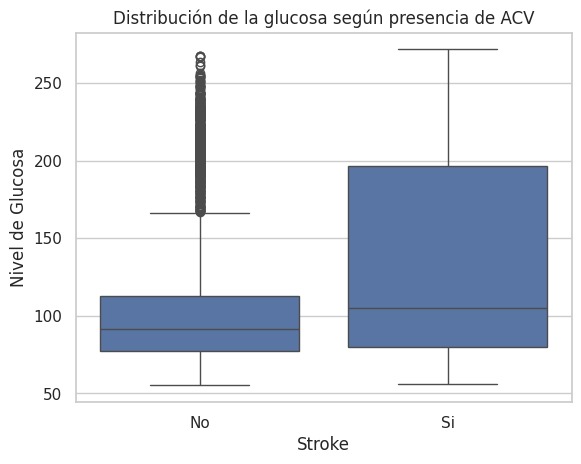

In [ ]:
#Veamos el boxplot
sns.boxplot(data=df1, x="stroke", y="avg_glucose_level")
plt.title("Distribución de la glucosa según presencia de ACV")
plt.xlabel("Stroke")
plt.ylabel("Nivel de Glucosa")
plt.xticks([1, 0], ["Si", "No"])
plt.show()

Grupo "No" (sin ACV): La mayoría de las personas tienen un nivel de glucosa en un rango bajo. La mediana está alrededor de 90 mg/dL. Sin embargo, hay una gran cantidad de valores atípicos, lo que indica que hay personas con niveles de glucosa extremadamente altos que no han sufrido un ACV.

Grupo "Sí" (con ACV): Este grupo tiene un rango mucho más amplio de niveles de glucosa. La mediana es notablemente más alta que la del grupo "No" (alrededor de 105 mg/dL). La caja es más grande, y aunque también hay valores atípicos, el rango intercuartílico (el 50% central de los datos) ya se encuentra en niveles de glucosa más elevados.

La conclusión principal del boxplot es que, aunque los niveles de glucosa pueden variar, los niveles más altos de glucosa están claramente asociados con una mayor probabilidad de haber sufrido un ACV.

In [ ]:
#Vamos a realizar un análisis similar para las variables bmi y glucose_level

glucose_Q1 = df1['avg_glucose_level'].quantile(0.25)

glucose_Q3 = df1['avg_glucose_level'].quantile(0.75)

#Cálculo del rango intercuartílico
glucose_IQR = glucose_Q3 - glucose_Q1

#Definición de los límites para detectar OUTLIERS
glucose_limite_inferior  = bmi_Q1 - 1.5 * glucose_IQR
glucose_limite_superior = bmi_Q3 + 1.5 * glucose_IQR

In [ ]:
#Observación de los valores Q1 y Q3
print(" Valor Q1:", glucose_Q1)
print("Valor Q3:", glucose_Q3)
#Valor del rango intercuartilico
print("Valor IQR:", glucose_IQR)
#Valores de rango inferior y superior
print("Valor limite inferior:", glucose_limite_inferior)
print("Valor limite superior:", glucose_limite_superior)

 Valor Q1: 77.245
Valor Q3: 114.09
Valor IQR: 36.845
Valor limite inferior: -31.467499999999998
Valor limite superior: 88.0675


In [ ]:
#Identificar outliers
df1[(df1['avg_glucose_level'] < glucose_limite_inferior) | (df1['avg_glucose_level'] > glucose_limite_superior)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_imputado
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,28.1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0,40.8
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0,24.5
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,18.6
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,40.0


Al observar las primeras filas, vemos que todos los individuos con niveles de glucosa por encima del límite tienen un stroke (ACV) con valor 1, lo que corrobora la idea de que los niveles de glucosa extremadamente altos están fuertemente relacionados con la presencia de un ACV.

Los resultados sugieren una fuerte correlación positiva entre niveles altos de glucosa y la presencia de un ACV, con el grupo que sufrió un ACV mostrando una mediana de glucosa más alta y un rango de valores más elevado en comparación con el grupo que no lo sufrió.

In [ ]:
#Voy a crear una variable donde solo consigne los Outliers para tratarlos
df_glucose_outliers = df1[(df1['avg_glucose_level'] < glucose_limite_inferior) | (df1['avg_glucose_level'] > glucose_limite_superior)]

In [ ]:
#Reordenamos los datos de manera descendente
df_glucose_outliers.sort_values(by='avg_glucose_level', ascending= False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_imputado
193,69112,Male,68.00,1,1,Yes,Private,Rural,271.74,31.1,smokes,1,31.1
1207,22440,Female,49.00,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0,29.3
3088,26267,Female,76.00,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,0,27.9
4983,10995,Male,76.00,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0,30.5
2462,27626,Female,60.00,0,0,No,Govt_job,Rural,266.59,25.5,never smoked,0,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,62475,Male,39.00,1,0,Yes,Private,Rural,88.18,33.5,smokes,0,33.5
4661,37492,Female,33.00,0,0,Yes,Private,Rural,88.17,38.6,formerly smoked,0,38.6
1259,27583,Male,49.00,0,0,Yes,Private,Rural,88.13,32.8,never smoked,0,32.8
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0,15.5


Son 2860 los datos atípicos con los que tratamos en esta variable. Eliminarlos no es una opción dado que perdemos muchisima informacion del dataset. La mejor opción en este caso sería **no eliminarlos ni imputarlos**, sino mantenerlos en el dataset, ya que son datos que probablemente representan una característica importante de la población estudiada.

Esto es lo adecuado por su relevancia clínica dado que la glucosa alta es un factor de riesgo conocido para enfermedades cardiovasculares y ACV. Los valores atípicos que se observan en el dataset (niveles de glucosa muy altos) no son errores de medición, sino que son datos reales y clínicamente relevantes. Representan a personas con hiperglucemia o diabetes, condiciones que están directamente relacionadas con la variable stroke.

Los outliers no son "ruido" en este caso; son información crítica que ayuda a entender la relación entre la glucosa y el ACV. Si los eliminamos o los "recortamos" (imputación), estaríamos eliminando la evidencia de que los niveles de glucosa extremadamente altos están fuertemente asociados con los ACV, lo cual es la conclusión principal de este análisis.

Como el objetivo de este análisis es construir un modelo predictivo, estos valores atípicos son fundamentales. El modelo deberá aprender que los niveles de glucosa por encima de cierto umbral son un fuerte predictor de un ACV, así que eliminar estos datos haría que el modelo perdiera esa capacidad de predicción.

#**Preparación del dataset para el modelado**

Para trabajar con estos datos, utilizaría un modelo de clasificación para predecir si una persona tendrá un accidente cerebrovascular (stroke). Esto se debe a que la variable objetivo, stroke, es categórica y binaria (1 para "Sí" y 0 para "No").

Antes de entrenar cualquier modelo, es crucial realizar una limpieza y preprocesamiento de los datos, lo que incluye tratar los valores nulos (NaN en la columna bmi, como ya se hizo anteriormente), codificar las variables categóricas (gender, ever_married, etc.) y escalar las variables numéricas (age, avg_glucose_level, bmi).

In [ ]:
# 1. Estandarizacion de las columnas numéricas
from sklearn.preprocessing import StandardScaler

# 2. Identificar las columnas numéricas que se van a estandarizar
columnas_numericas = ['age', 'avg_glucose_level', 'bmi']

# 3. Inicializar el escalador
scaler = StandardScaler()

# 4. Ajustar y transformar los datos
# df[columnas_numericas] selecciona solo las columnas que queremos escalar
# El metodo fit_transform() hace dos cosas a la vez:
#   - fit(): Calcula la media (mean) y la desviación estándar (std) de los datos.
#   - transform(): Aplica la estandarización usando los valores calculados.
df1[columnas_numericas] = scaler.fit_transform(df1[columnas_numericas])

# 5. Verificar el resultado
print("Media de las columnas estandarizadas:\n", df1[columnas_numericas].mean())
print("\nDesviación estándar de las columnas estandarizadas:\n", df1[columnas_numericas].std())

Media de las columnas estandarizadas:
 age                  5.005781e-17
avg_glucose_level    1.001156e-16
bmi                 -4.449583e-17
dtype: float64

Desviación estándar de las columnas estandarizadas:
 age                  1.000098
avg_glucose_level    1.000098
bmi                  1.000098
dtype: float64


Los resultados confirman que las variables numéricas ahora tienen una media muy cercana a 0 y una desviación estándar muy cercana a 1.

Media: Los valores como 5.005781e−17 son notación científica. Por ejemplo, 5.005781×10−17 es un número extremadamente pequeño, prácticamente cero.

Desviación Estándar: El valor 1.000098 es prácticamente 1.

Estos son exactamente los resultados esperados de la estandarización con StandardScaler. Los valores de las columnas originales (age, avg_glucose_level y bmi) se han transformado para ajustarse a esta nueva escala.

In [ ]:
df1[columnas_numericas]

,age,avg_glucose_level,bmi
0,1.051434,2.706375,1.005086
1,0.786070,2.121559,-0.098981
2,1.626390,-0.005028,0.472536
3,0.255342,1.437358,0.719327
4,1.582163,1.501184,-0.631531
...,...,...,...
5105,1.626390,-0.494658,-0.098981
5106,1.670617,0.420775,1.446713
5107,-0.363842,-0.511443,0.225745
5108,0.343796,1.328257,-0.423706


Ya no estamos trabajando con valores absolutos (años, mg/dL), sino con un valor relativo que nos dice si la observación está por encima o por debajo del promedio y cuán lejos está.

##**Transformacion de variables categóricas**

In [ ]:
# Lista de las columnas categóricas a codificar
columnas_categoricas = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Realizar la codificación One-Hot en estas columnas
# pd.get_dummies() crea las nuevas columnas binarias.
# El parámetro `columns` especifica qué columnas deben ser codificadas.
df_codificado = pd.get_dummies(df1, columns=columnas_categoricas, dtype=int)

# Imprimir las primeras filas para ver el resultado
print(df_codificado.head())

      id       age  hypertension  heart_disease  avg_glucose_level       bmi  \
0   9046  1.051434             0              1           2.706375  1.005086   
1  51676  0.786070             0              0           2.121559 -0.098981   
2  31112  1.626390             0              1          -0.005028  0.472536   
3  60182  0.255342             0              0           1.437358  0.719327   
4   1665  1.582163             1              0           1.501184 -0.631531   

   stroke  bmi_imputado  gender_Female  gender_Male  ...  \
0       1          36.6              0            1  ...   
1       1          28.1              1            0  ...   
2       1          32.5              0            1  ...   
3       1          34.4              1            0  ...   
4       1          24.0              1            0  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1           

El DataFrame tiene ahora 24 columnas y 5 filas. Las columnas se ven de la siguiente manera:

Variables numéricas: age, avg_glucose_level y bmi están estandarizadas, con valores positivos y negativos.

Variable stroke: La variable objetivo (stroke) sigue siendo un int (1 o 0), que es el formato adecuado para un modelo de clasificación.

Variables categóricas: Las variables como gender, work_type, Residence_type, y smoking_status han sido codificadas en múltiples columnas binarias, con nombres como work_type_Private o smoking_status_formerly smoked.

El dataset ya no tiene valores nulos (NaNs), ni variables numéricas en escalas desequilibradas, ni variables categóricas en formato de texto.

##**Usamos el nuevo df_codificado para el entrenamiento**

In [ ]:
#Realizo una copia del df para trabajar con el mismo ya procesado
df_codificado.to_excel('df_codificado_v1.xlsx', index=False)

In [ ]:
!gdown 1owZ-1Ildxy7ly8Y1laeCwIYQWzgmZKyc

Downloading...
From: https://drive.google.com/uc?id=1owZ-1Ildxy7ly8Y1laeCwIYQWzgmZKyc
To: /content/df_codificado_v1.xlsx
100% 532k/532k [00:00<00:00, 101MB/s]


In [ ]:
df=pd.read_excel('/content/df_codificado_v1.xlsx')
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_imputado,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,2.706375,1.005086,1,36.6,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,0.786070,0,0,2.121559,-0.098981,1,28.1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,1.626390,0,1,-0.005028,0.472536,1,32.5,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,0.255342,0,0,1.437358,0.719327,1,34.4,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,1.582163,1,0,1.501184,-0.631531,1,24.0,1,0,...,0,0,1,0,1,0,0,0,1,0


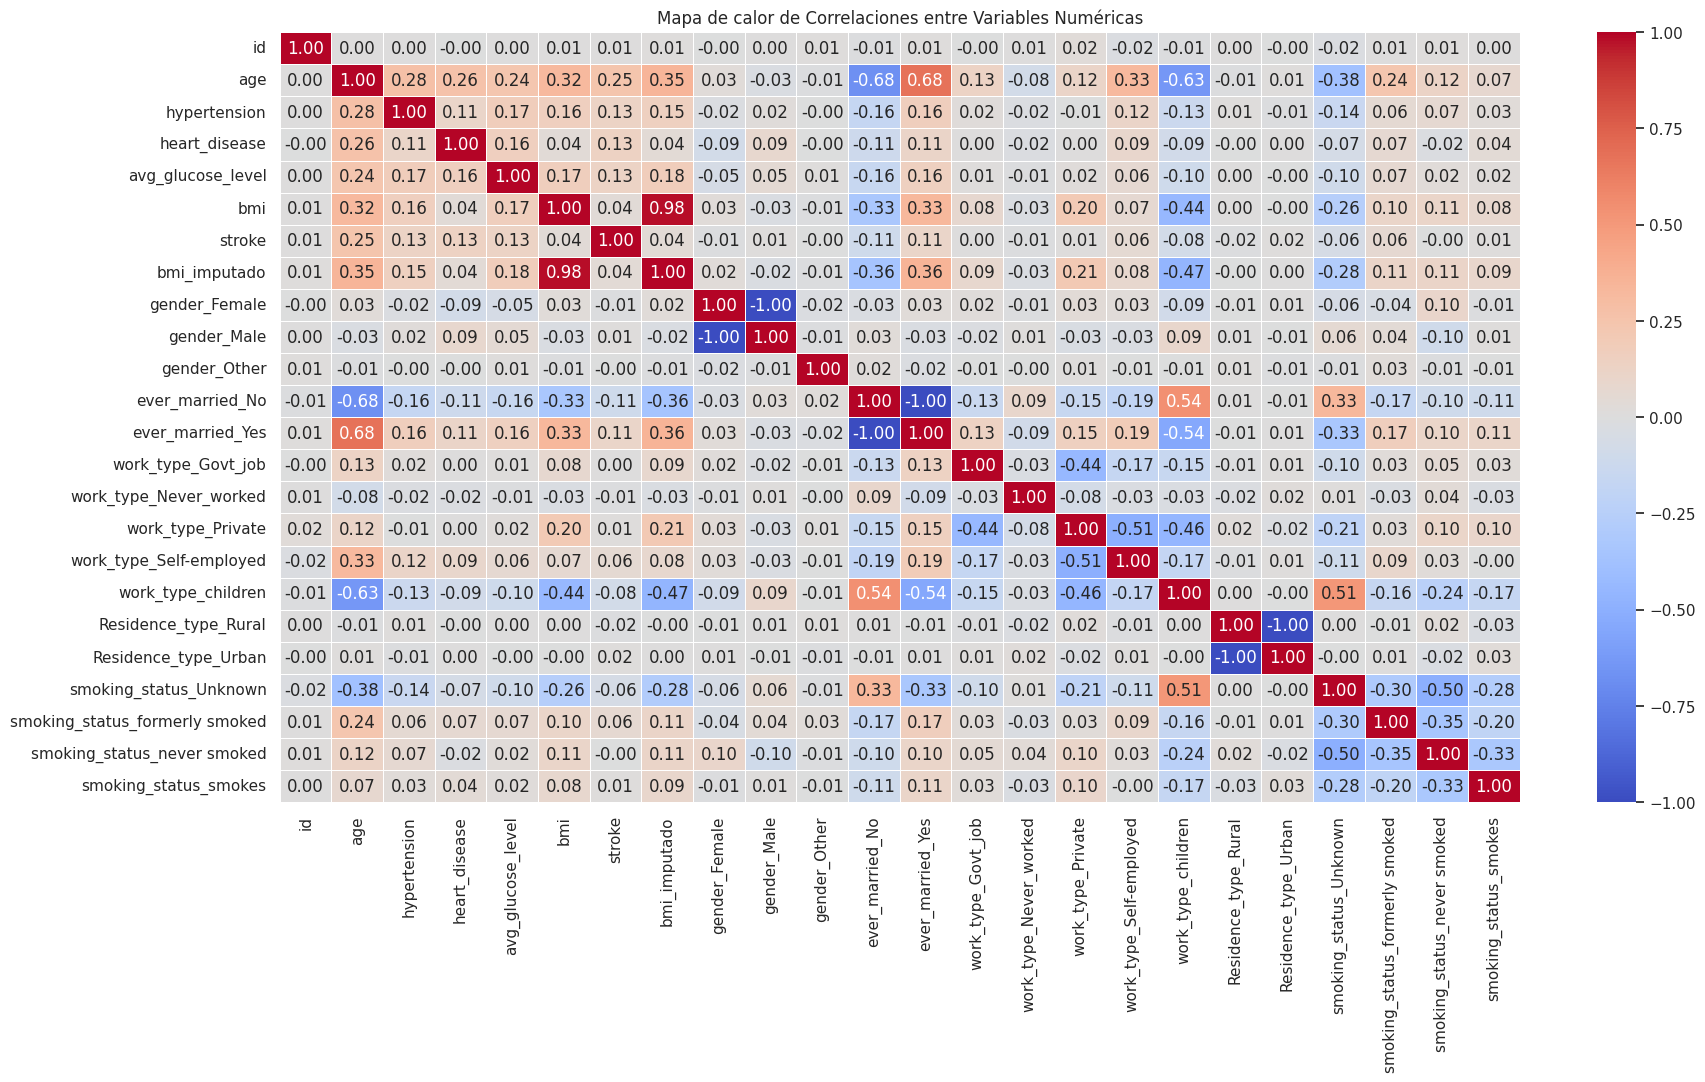

In [ ]:
# Cálculo de la matriz de correlaciones
corr_matrix = df.corr(numeric_only=True)

# Configuración del gráfico
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de Correlaciones entre Variables Numéricas")
plt.show()

El mapa de calor nos permite identificar rápidamente las relaciones más fuertes entre las variables. Los coeficientes de correlación más altos con stroke age (0.26), hypertension (0.13), heart_disease (0.13) y avg_glucose_level (0.17) son las variables más positivamente correlacionadas con la presencia de un ACV. Esto confirma que estas son las variables más predictivas para el modelo.

Existe una correlación positiva muy fuerte entre age y ever_married_Yes (0.68), lo cual es lógico, ya que las personas que se han casado tienden a ser mayores.

Gender_Female y gender_Male tienen una correlación perfecta de -1.00, lo que es normal y esperado, ya que son el opuesto exacto la una de la otra en el formato de codificación One-Hot.

#**Entrenamiento del modelo**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!gdown 1owZ-1Ildxy7ly8Y1laeCwIYQWzgmZKyc

 #Dataset
df = pd.read_excel('/content/df_codificado_v1.xlsx')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1owZ-1Ildxy7ly8Y1laeCwIYQWzgmZKyc
To: /content/df_codificado_v1.xlsx
100% 532k/532k [00:00<00:00, 46.5MB/s]


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_imputado,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,2.706375,1.005086,1,36.6,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,0.786070,0,0,2.121559,-0.098981,1,28.1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,1.626390,0,1,-0.005028,0.472536,1,32.5,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,0.255342,0,0,1.437358,0.719327,1,34.4,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,1.582163,1,0,1.501184,-0.631531,1,24.0,1,0,...,0,0,1,0,1,0,0,0,1,0


##**Selección de variables**

In [ ]:
#Eliminacion de la columna id debido a que ello solo entorpeceria al proceso de aprendizaje del modelo
df.drop('id', axis=1, inplace=True)

#Para poder supervisar un valor tenemos que darle nuestras x para ver si con ellas puedo predecir y
X = df.drop('stroke', axis=1).values #elimino de mi dataset la variable a predecir

y = df['stroke'].values #defino el target, la variable a predecir

In [ ]:
#Validacion del primer regristro
X[0:1]

array([[ 1.05143428,  0.        ,  1.        ,  2.70637544,  1.00508597,
        36.6       ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ]])

In [ ]:
#Validación del primer registro
y[0:1]

array([1])

##**Entrenamiento**

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Cantidad de datos parciales
X_train.shape, X_test.shape

((3577, 22), (1533, 22))

In [ ]:
#Cantidad de datos parciales
y_train.shape, y_test.shape

((3577,), (1533,))

#Modelo de clasificación: **Regresión Logística**

In [ ]:
# Importar la clase del modelo
from sklearn.linear_model import LogisticRegression

# 1. Inicializar el modelo
# 'random_state' asegura que los resultados sean reproducibles
modelo_reg_logistica = LogisticRegression(random_state=42)

# 2. Entrenar el modelo
# El modelo aprende a partir de los datos de entrenamiento (X_train y y_train)
modelo_reg_logistica.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

El resultado que he obtenido es una advertencia. Nos dice que el algoritmo de entrenamiento del modelo (llamado lbfgs) no logró encontrar la solución óptima en el número de iteraciones que tenía por defecto (que son 100). Es por ello que aumentaremos el número de iteraciones. Al darle más tiempo al modelo para "pensar", le permitimos encontrar una mejor solución

In [ ]:
# 1. Inicializar el modelo con más iteraciones
# 'max_iter=1000' le da más tiempo al algoritmo para encontrar la mejor solución
modelo_reg_logistica = LogisticRegression(random_state=42, max_iter=1000)

# 2. Entrenar el modelo
modelo_reg_logistica.fit(X_train, y_train)

# Ahora puedes continuar con la predicción y la evaluación
from sklearn.metrics import accuracy_score
y_pred = modelo_reg_logistica.predict(X_test)
precision = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo de Regresión Logística: {precision:.4f}")

Precisión del modelo de Regresión Logística: 0.9504


Una precisión de 0.9504 significa que el modelo acertó en el 95.04% de sus predicciones en el conjunto de prueba. A primera vista, este es un resultado muy bueno. Sin embargo, en problemas de clasificación, donde la variable objetivo es binaria y los datos suelen estar desequilibrados, una precisión tan alta puede ser engañosa.

Para obtener una visión más completa del rendimiento del modelo, analizaremos otras métricas.

In [ ]:
# Importar las métricas
from sklearn.metrics import classification_report, confusion_matrix

# Generar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(reporte_clasificacion)

Matriz de Confusión:
[[1456    1]
 [  75    1]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.50      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533



Matriz de confusión:
1456 (Verdaderos Negativos): El modelo predijo correctamente que 1456 personas no tendrían un ACV. Esto es un gran acierto.

1 (Falso Positivo): El modelo predijo incorrectamente que 1 persona tendría un ACV cuando en realidad no lo tuvo. Este número es muy bajo.

75 (Falsos Negativos): El modelo predijo incorrectamente que 75 personas no tendrían un ACV cuando en realidad sí lo tuvieron. Este es el resultado más preocupante.

1 (Verdadero Positivo): El modelo predijo correctamente que 1 persona tendría un ACV. Este número es extremadamente bajo.

Reporte de Clasificación
Clase 0 (No Stroke): El modelo es casi perfecto.

Precisión: 0.95 (De todas las veces que el modelo predijo "No Stroke", el 95% de las veces acertó).

Exhaustividad: 1.00 (El modelo identificó correctamente al 100% de las personas que no tuvieron un ACV).

Clase 1 (Stroke): Aquí se muestra el verdadero problema del modelo.

Precisión: 0.50 (De todas las veces que el modelo predijo "Stroke", solo acertó el 50% de las veces).

Exhaustividad (Recall): 0.01. Este es el número más importante. De todas las personas que realmente sufrieron un ACV en el conjunto de prueba (76 en total: 75 + 1), el modelo solo fue capaz de identificar a 1 de ellas.

La alta precisión general del modelo se debe a que acierta mayormente con la clase mayoritaria (no stroke). Lo cual lo hace inutil para el objetivo del proyecto, que es predecir a las personas que pueden predecir un ACV.

##Regresión Logística con parámetros balanceados

In [ ]:
# Re-importarémos el modelo con el parámetro class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Iniciamos el modelo con el peso de clases balanceado
# El parámetro 'class_weight' compensa el desequilibrio de las clases
modelo_balanceado = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# 2. Entrenamiento el modelo
modelo_balanceado.fit(X_train, y_train)

# 3. predicciones y evaluación
y_pred_balanceado = modelo_balanceado.predict(X_test)

# Matriz de confusión y el reporte de clasificación
matriz_confusion_balanceada = confusion_matrix(y_test, y_pred_balanceado)
reporte_clasificacion_balanceado = classification_report(y_test, y_pred_balanceado)

print("Matriz de Confusión (Modelo Balanceado):")
print(matriz_confusion_balanceada)
print("\nReporte de Clasificación (Modelo Balanceado):")
print(reporte_clasificacion_balanceado)

Matriz de Confusión (Modelo Balanceado):
[[1102  355]
 [  20   56]]

Reporte de Clasificación (Modelo Balanceado):
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1457
           1       0.14      0.74      0.23        76

    accuracy                           0.76      1533
   macro avg       0.56      0.75      0.54      1533
weighted avg       0.94      0.76      0.82      1533



Estos resultados muestran una mejora significativa en el rendimiento del modelo para la clase minoritaria. El uso de class_weight='balanced' ha tenido el efecto deseado.

**Matriz de Confusión**

Verdaderos Negativos (1102): El modelo predijo correctamente que 1102 personas no tendrían un ACV. Es un número menor que en el modelo anterior (1456), lo que significa que el modelo ahora es más propenso a hacer predicciones positivas.

Falsos Positivos (355): El modelo predijo incorrectamente que 355 personas tendrían un ACV. Este número ha aumentado considerablemente.

Falsos Negativos (20): El modelo predijo incorrectamente que 20 personas no tendrían un ACV cuando sí lo tuvieron. Este es el cambio más importante. En el modelo anterior, eran 75. El modelo ahora es mucho mejor identificando a las personas que realmente tienen un ACV.

Verdaderos Positivos (56): El modelo predijo correctamente que 56 personas tendrían un ACV. En el modelo anterior, este número era 1. La capacidad del modelo para encontrar casos positivos ha mejorado drásticamente.

**Reporte de Clasificación**

Precisión de la clase 1 (Stroke): 0.14. Esto significa que cuando el modelo predijo un ACV, solo acertó el 14% de las veces. Ha disminuido considerablemente.

Exhaustividad (Recall) de la clase 1 (Stroke): 0.74. Este es el resultado más importante para nuestro objetivo. El modelo ahora es capaz de identificar el 74% de todos los casos de ACV en el conjunto de prueba. Esto representa una mejora masiva sobre el 1% del modelo anterior.

Puntuación F1 de la clase 1 (Stroke): 0.23. Aunque aún es baja, ha mejorado significativamente.

Precisión general: La precisión general del modelo ha bajado de 0.95 a 0.76. Esto es un costo aceptable para lograr nuestro objetivo principal.

##RandomForest
Probaremos si mejoramos la capacidad de prediccion de nuestro modelo utilizando Random Forest

In [ ]:
# Importamos la clase del modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# 1. Iniciammos el modelo
# Le pedimos que construya 100 árboles (n_estimators)
# y que compense el desequilibrio de clases con 'class_weight'
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# 2. Entrenamos el modelo
modelo_rf.fit(X_train, y_train)

# 3. Hacemos predicciones
y_pred_rf = modelo_rf.predict(X_test)

Evaluamos el modelo

In [ ]:
# Importar las métricas
from sklearn.metrics import classification_report, confusion_matrix

# Generamos la matriz de confusión
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusión (Random Forest):")
print(matriz_confusion_rf)

# Generamos el reporte de clasificación
reporte_clasificacion_rf = classification_report(y_test, y_pred_rf)
print("\nReporte de Clasificación (Random Forest):")
print(reporte_clasificacion_rf)

Matriz de Confusión (Random Forest):
[[1455    2]
 [  76    0]]

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



**Matriz de confusión**

Verdaderos Negativos (1455): El modelo predijo correctamente que 1455 personas no tendrían un ACV.

Falsos Positivos (2): El modelo predijo incorrectamente que 2 personas tendrían un ACV.

Falsos Negativos (76): El modelo predijo incorrectamente que 76 personas no tendrían un ACV cuando en realidad sí lo tuvieron.

Verdaderos Positivos (0): El modelo predijo correctamente que 0 personas tendrían un ACV.

**Reporte de clasificación**

El reporte de clasificación muestra resultados similares a la matriz de confusión.

Clase 0 (No Stroke): El modelo es casi perfecto, con una precisión de 0.95 y una exhaustividad de 1.00.

Clase 1 (Stroke): El rendimiento para la clase minoritaria es muy pobre. Tanto la precisión como la exhaustividad son 0.00.

#Conclusiones finales

El modelo de Random Forest, con el ajuste por defecto de class_weight, no ha mejorado la capacidad de predicción de nuestro modelo para la clase minoritaria (Stroke=1). De hecho, su rendimiento para identificar los casos de ACV es incluso peor que el modelo de Regresión Logística anterior, ya que no fue capaz de identificar ningún caso positivo.

Esto subraya el desafío del desequilibrio de clases extremo.

A pesar de que el modelo de Random Forest tiene una precisión general más alta (0.95), es completamente inútil para el objetivo de nuestro proyecto. Su exhaustividad de 0.00 y 0 verdaderos positivos para la clase "Stroke" significan que no fue capaz de identificar a ninguna de las personas que sufrieron un ACV. Su alta precisión se debe a que predijo incorrectamente que casi todas las personas no tendrían un ACV.

En cambio, el modelo de Regresión Logística balanceada es mucho más efectivo para nuestro propósito. Aunque su precisión general es menor, tiene una exhaustividad de 0.74 para la clase "Stroke", lo que significa que fue capaz de identificar al 74% de las personas que sufrieron un ACV. Para un problema de salud, es más importante identificar a las personas en riesgo (minimizar los falsos negativos) que tener una alta precisión general.